In [ ]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 63619179.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print('The number of training samples: {}'.format(len(train_data)))
print('The number of test samples: {}'.format(len(test_data)))

The number of training samples: 50000
The number of test samples: 10000


### Helper function
To display images in the training set

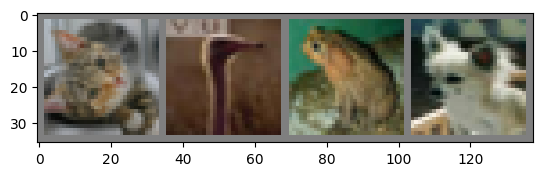

  cat  bird  frog   dog


In [ ]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [ ]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.950
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.844
[1, 3500] loss: 1.792
[1, 3750] loss: 1.752
[1, 4000] loss: 1.762
[1, 4250] loss: 1.709
[1, 4500] loss: 1.718
[1, 4750] loss: 1.691
[1, 5000] loss: 1.683
[1, 5250] loss: 1.633
[1, 5500] loss: 1.668
[1, 5750] loss: 1.694
[1, 6000] loss: 1.646
[1, 6250] loss: 1.564
[1, 6500] loss: 1.600
[1, 6750] loss: 1.553
[1, 7000] loss: 1.555
[1, 7250] loss: 1.519
[1, 7500] loss: 1.527
[1, 7750] loss: 1.530
[1, 8000] loss: 1.506
[1, 8250] loss: 1.533
[1, 8500] loss: 1.494
[1, 8750] loss: 1.486
[1, 9000] loss: 1.533
[1, 9250] loss: 1.511
[1, 9500] loss: 1.477
[1, 9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] loss: 1.418
[1, 11250] loss: 1.460
[1, 115

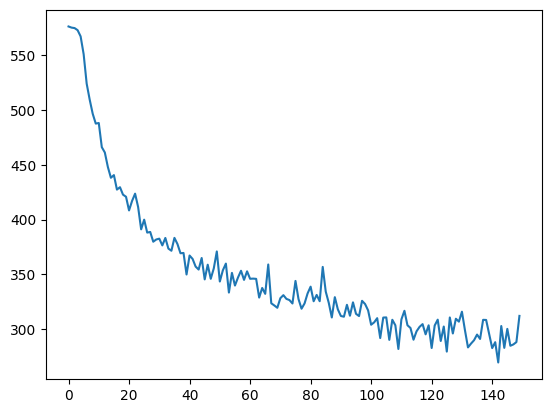

In [ ]:
### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
device = torch.device("cpu")
net = Net()
net.to(device)

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code
  plt.plot(running_loss_list)
plot_loss_curve(running_loss_list)


(ii) Paste the above code in the code block below and modify it to use GPUs for training


cuda:0
[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.202
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.983
[1, 2500] loss: 1.948
[1, 2750] loss: 1.949
[1, 3000] loss: 1.863
[1, 3250] loss: 1.842
[1, 3500] loss: 1.792
[1, 3750] loss: 1.754
[1, 4000] loss: 1.763
[1, 4250] loss: 1.711
[1, 4500] loss: 1.715
[1, 4750] loss: 1.692
[1, 5000] loss: 1.686
[1, 5250] loss: 1.638
[1, 5500] loss: 1.665
[1, 5750] loss: 1.701
[1, 6000] loss: 1.650
[1, 6250] loss: 1.572
[1, 6500] loss: 1.603
[1, 6750] loss: 1.548
[1, 7000] loss: 1.565
[1, 7250] loss: 1.522
[1, 7500] loss: 1.529
[1, 7750] loss: 1.534
[1, 8000] loss: 1.511
[1, 8250] loss: 1.539
[1, 8500] loss: 1.491
[1, 8750] loss: 1.498
[1, 9000] loss: 1.535
[1, 9250] loss: 1.512
[1, 9500] loss: 1.474
[1, 9750] loss: 1.488
[1, 10000] loss: 1.403
[1, 10250] loss: 1.474
[1, 10500] loss: 1.446
[1, 10750] loss: 1.427
[1, 11000] loss: 1.429
[1, 11250] loss: 1.466


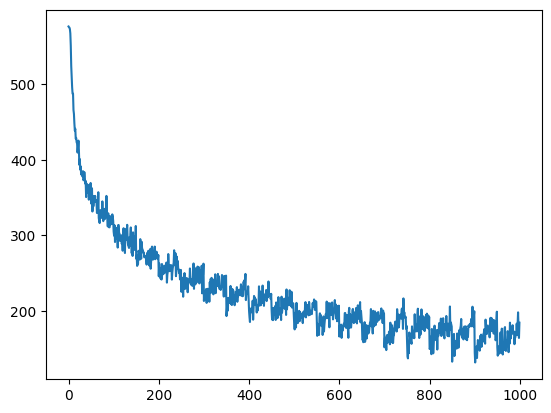

In [ ]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = Net()
net.to(device)

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code
  plt.plot(running_loss_list)
plot_loss_curve(running_loss_list)


In [ ]:
### Training the classifier

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # for CPU training.
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.cuda())
        loss = criterion(outputs.cuda(), labels.cuda())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.cuda().item()
        if i % 250 == 249:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 250))
            running_loss = 0.0

print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


[1,   250] loss: 2.301
[1,   500] loss: 2.301
[1,   750] loss: 2.300
[1,  1000] loss: 2.307
[1,  1250] loss: 2.305
[1,  1500] loss: 2.305
[1,  1750] loss: 2.302
[1,  2000] loss: 2.303
[1,  2250] loss: 2.305
[1,  2500] loss: 2.303
[1,  2750] loss: 2.300
[1,  3000] loss: 2.300
[1,  3250] loss: 2.302
[1,  3500] loss: 2.298
[1,  3750] loss: 2.300
[1,  4000] loss: 2.299
[1,  4250] loss: 2.300
[1,  4500] loss: 2.296
[1,  4750] loss: 2.295
[1,  5000] loss: 2.297
[1,  5250] loss: 2.295
[1,  5500] loss: 2.294
[1,  5750] loss: 2.293
[1,  6000] loss: 2.291
[1,  6250] loss: 2.291
[1,  6500] loss: 2.289
[1,  6750] loss: 2.288
[1,  7000] loss: 2.288
[1,  7250] loss: 2.281
[1,  7500] loss: 2.280
[1,  7750] loss: 2.276
[1,  8000] loss: 2.271
[1,  8250] loss: 2.272
[1,  8500] loss: 2.263
[1,  8750] loss: 2.253
[1,  9000] loss: 2.254
[1,  9250] loss: 2.242
[1,  9500] loss: 2.234
[1,  9750] loss: 2.221
[1, 10000] loss: 2.202
[1, 10250] loss: 2.202
[1, 10500] loss: 2.184
[1, 10750] loss: 2.152
[1, 11000] 

### Testing the network

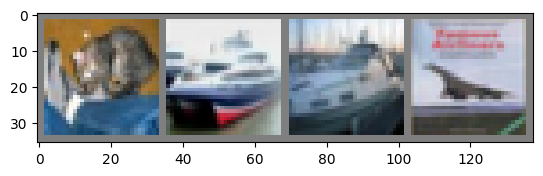

GroundTruth:    cat  ship  ship plane


NameError: name 'PATH' is not defined

In [ ]:
## displaying images from test set
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set.

In [ ]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct / total * 100## stores the accuracy computed in the above loop
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 63 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

In [ ]:
def plot_loss_curve(running_loss_list):
  ## complete code
  plt.plot(running_loss_list)

def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """

  ## complete the code.
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  if use_gpu:
    net = Net().cuda()
  else:
    net = Net().cpu()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


  ## Defining Training Parameters

  running_loss_list = [] # list to store running loss in the code below
  for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        if use_gpu:
          outputs = net(inputs.cuda())
          loss = criterion(outputs.cuda(), labels.cuda())
        else:
          outputs = net(inputs.cpu())
          loss = criterion(outputs.cpu(), labels.cpu())
        loss.backward()
        optimizer.step()

        # print statistics
        if use_gpu:
          running_loss += loss.cuda().item()
        else:
          running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

  print('Training Complete')
  PATH = model_save_path
  torch.save(net.state_dict(), PATH)
  plot_loss_curve(running_loss_list)
  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):

  ### complete the code to compute accuracy and store it as the variable acc
  net = Net()
  net.load_state_dict(torch.load(model_path))
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  acc  = correct / total * 100## stores the accuracy computed in the above loop
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc))
  return acc

[1,   250] loss: 2.304
[1,   500] loss: 2.300
[1,   750] loss: 2.298
[1,  1000] loss: 2.290
[1,  1250] loss: 2.268
[1,  1500] loss: 2.203
[1,  1750] loss: 2.095
[1,  2000] loss: 2.037
[1,  2250] loss: 1.985
[1,  2500] loss: 1.950
[1,  2750] loss: 1.952
[1,  3000] loss: 1.864
[1,  3250] loss: 1.844
[1,  3500] loss: 1.792
[1,  3750] loss: 1.752
[1,  4000] loss: 1.762
[1,  4250] loss: 1.709
[1,  4500] loss: 1.718
[1,  4750] loss: 1.691
[1,  5000] loss: 1.683
[1,  5250] loss: 1.633
[1,  5500] loss: 1.668
[1,  5750] loss: 1.694
[1,  6000] loss: 1.646
[1,  6250] loss: 1.564
[1,  6500] loss: 1.600
[1,  6750] loss: 1.553
[1,  7000] loss: 1.555
[1,  7250] loss: 1.519
[1,  7500] loss: 1.527
[1,  7750] loss: 1.530
[1,  8000] loss: 1.506
[1,  8250] loss: 1.533
[1,  8500] loss: 1.494
[1,  8750] loss: 1.486
[1,  9000] loss: 1.533
[1,  9250] loss: 1.511
[1,  9500] loss: 1.477
[1,  9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] 

60.660000000000004

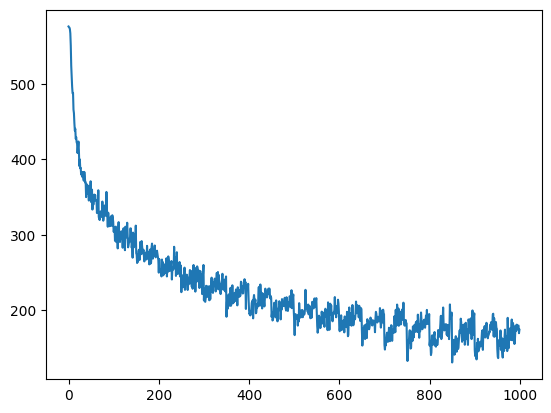

In [ ]:
train_load = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)
train(train_loader = train_load, num_epochs=20, use_gpu = False)
test(test_loader=test_load)

[1,   250] loss: 2.304
[1,   500] loss: 2.300
[1,   750] loss: 2.298
[1,  1000] loss: 2.290
[1,  1250] loss: 2.268
[1,  1500] loss: 2.203
[1,  1750] loss: 2.095
[1,  2000] loss: 2.037
[1,  2250] loss: 1.985
[1,  2500] loss: 1.950
[1,  2750] loss: 1.952
[1,  3000] loss: 1.864
[1,  3250] loss: 1.844
[1,  3500] loss: 1.792
[1,  3750] loss: 1.752
[1,  4000] loss: 1.762
[1,  4250] loss: 1.709
[1,  4500] loss: 1.718
[1,  4750] loss: 1.691
[1,  5000] loss: 1.683
[1,  5250] loss: 1.633
[1,  5500] loss: 1.668
[1,  5750] loss: 1.694
[1,  6000] loss: 1.646
[1,  6250] loss: 1.564
[1,  6500] loss: 1.600
[1,  6750] loss: 1.553
[1,  7000] loss: 1.555
[1,  7250] loss: 1.519
[1,  7500] loss: 1.527
[1,  7750] loss: 1.530
[1,  8000] loss: 1.506
[1,  8250] loss: 1.533
[1,  8500] loss: 1.494
[1,  8750] loss: 1.486
[1,  9000] loss: 1.533
[1,  9250] loss: 1.511
[1,  9500] loss: 1.477
[1,  9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] 

62.18

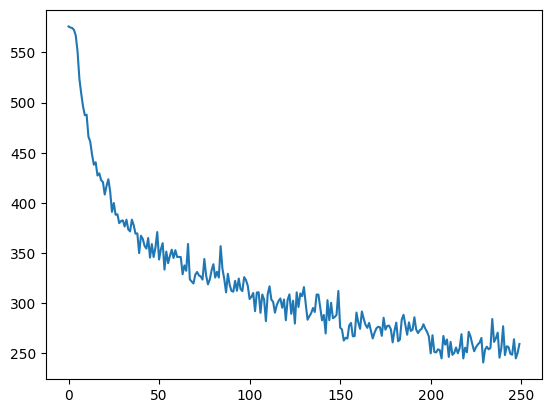

In [ ]:
train_load = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)
train(train_loader = train_load, num_epochs=5, use_gpu = False)
test(test_loader=test_load)

[1,   250] loss: 2.303
[1,   500] loss: 2.300
[1,   750] loss: 2.297
[1,  1000] loss: 2.286
[1,  1250] loss: 2.252
[1,  1500] loss: 2.150
[1,  1750] loss: 2.020
[1,  2000] loss: 1.958
[1,  2250] loss: 1.896
[1,  2500] loss: 1.838
[1,  2750] loss: 1.787
[1,  3000] loss: 1.728
[2,   250] loss: 1.692
[2,   500] loss: 1.657
[2,   750] loss: 1.640
[2,  1000] loss: 1.594
[2,  1250] loss: 1.582
[2,  1500] loss: 1.538
[2,  1750] loss: 1.542
[2,  2000] loss: 1.546
[2,  2250] loss: 1.534
[2,  2500] loss: 1.516
[2,  2750] loss: 1.482
[2,  3000] loss: 1.487
[3,   250] loss: 1.448
[3,   500] loss: 1.449
[3,   750] loss: 1.450
[3,  1000] loss: 1.402
[3,  1250] loss: 1.410
[3,  1500] loss: 1.385
[3,  1750] loss: 1.378
[3,  2000] loss: 1.397
[3,  2250] loss: 1.369
[3,  2500] loss: 1.385
[3,  2750] loss: 1.350
[3,  3000] loss: 1.349
[4,   250] loss: 1.312
[4,   500] loss: 1.305
[4,   750] loss: 1.320
[4,  1000] loss: 1.348
[4,  1250] loss: 1.285
[4,  1500] loss: 1.294
[4,  1750] loss: 1.277
[4,  2000] 

57.93000000000001

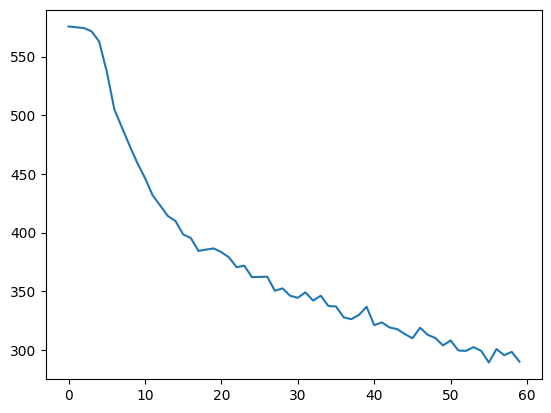

In [ ]:
train_load = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False, num_workers=2)
train(train_loader = train_load, num_epochs=5, use_gpu = False)
test(test_loader=test_load)

[1,   250] loss: 2.303
[1,   500] loss: 2.300
[1,   750] loss: 2.297
[1,  1000] loss: 2.286
[1,  1250] loss: 2.252
[1,  1500] loss: 2.150
[1,  1750] loss: 2.020
[1,  2000] loss: 1.958
[1,  2250] loss: 1.896
[1,  2500] loss: 1.838
[1,  2750] loss: 1.787
[1,  3000] loss: 1.728
[2,   250] loss: 1.692
[2,   500] loss: 1.657
[2,   750] loss: 1.640
[2,  1000] loss: 1.594
[2,  1250] loss: 1.582
[2,  1500] loss: 1.538
[2,  1750] loss: 1.542
[2,  2000] loss: 1.546
[2,  2250] loss: 1.534
[2,  2500] loss: 1.516
[2,  2750] loss: 1.482
[2,  3000] loss: 1.487
[3,   250] loss: 1.448
[3,   500] loss: 1.449
[3,   750] loss: 1.450
[3,  1000] loss: 1.402
[3,  1250] loss: 1.410
[3,  1500] loss: 1.385
[3,  1750] loss: 1.378
[3,  2000] loss: 1.397
[3,  2250] loss: 1.369
[3,  2500] loss: 1.385
[3,  2750] loss: 1.350
[3,  3000] loss: 1.349
[4,   250] loss: 1.312
[4,   500] loss: 1.305
[4,   750] loss: 1.320
[4,  1000] loss: 1.348
[4,  1250] loss: 1.285
[4,  1500] loss: 1.294
[4,  1750] loss: 1.277
[4,  2000] 

65.89

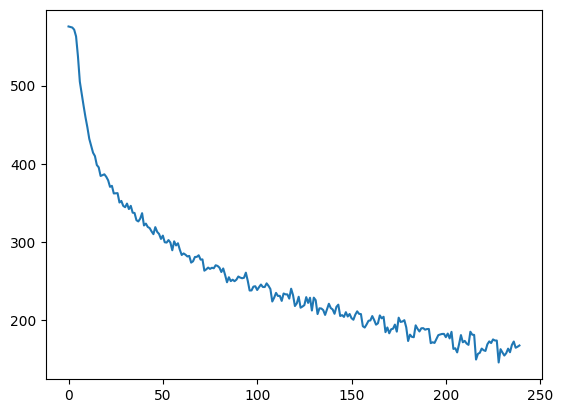

In [ ]:
train_load = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False, num_workers=2)
train(train_loader = train_load, num_epochs=20, use_gpu = False)
test(test_loader=test_load)